<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/02Apr20_4_groupby_pivots_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group By Lab

### Introduction

In this lesson, we'll continue our exploration of the FEMA dataset.  This time we'll do so using the group by and pivot functions.

### Loading our Data

Let's begin by loading our data.

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/exploring-pandas/master/formatted_claims_county.txt"
df_claims = pd.read_csv(url, sep='\t')

In [0]:
df_claims[:3]

,state,county,total_loss,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,383,259,11,113,5.406710e+06
1,ALABAMA,BALDWIN COUNTY,17628,14064,10,3554,5.507447e+08
2,ALABAMA,BARBOUR COUNTY,30,17,0,13,6.780529e+05


And let's remove change the formatting of our data away from scientific notation.

In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [0]:
df_claims[:3]

,state,county,total_loss,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,383,259,11,113,5406709.64
1,ALABAMA,BALDWIN COUNTY,17628,14064,10,3554,550744673.38
2,ALABAMA,BARBOUR COUNTY,30,17,0,13,678052.93


Notice with this dataset, our missing data is removed.

In [0]:
df_claims.isna().sum()
# write code to check na values across columns

# state          0
# county         0
# total_loss     0
# closed_loss    0
# open_loss      0
# cwop_loss      0
# total_pay      0

state          0
county         0
total_loss     0
closed_loss    0
open_loss      0
cwop_loss      0
total_pay      0
dtype: int64

And let's remove our `total_loss` column.

In [0]:
df_claims_reduced = df_claims.drop('total_loss', axis=1)
df_claims_reduced.head()

,state,county,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,259,11,113,5406709.64
1,ALABAMA,BALDWIN COUNTY,14064,10,3554,550744673.38
2,ALABAMA,BARBOUR COUNTY,17,0,13,678052.93
3,ALABAMA,BIBB COUNTY,2,0,3,4355.14
4,ALABAMA,BLOUNT COUNTY,19,0,5,1084320.81


In [0]:
df_claims_reduced.columns
# ['state', 'county', 'closed_loss', 'open_loss', 'cwop_loss',
#      'total_pay']

Index(['state', 'county', 'closed_loss', 'open_loss', 'cwop_loss',
       'total_pay'],
      dtype='object')

### State Level Data

If we would like to get state level data, we'll need to begin by grouping our data by the state, and then let's call describe to get an overview for each state.

In [0]:
state_grouped = df_claims_reduced.groupby(['state']).describe()

In [0]:
state_grouped[:4]
# 	count	mean	std	min	25%	50%	75%	max	count	mean	...	75%	max	count	mean	std	min	25%	50%	75%	max
# state																					
# ALABAMA	61.00	520.75	2311.04	0.00	7.00	27.00	93.00	14064.00	61.00	0.64	...	27.00	3554.00	61.00	16771509.61	83074427.40	0.00	103893.19	506268.81	1084320.81	550744673.38
# ALASKA	15.00	28.00	41.38	0.00	1.50	14.00	42.50	157.00	15.00	0.20	...	17.00	70.00	15.00	647465.67	988075.98	0.00	21770.76	313648.21	611153.74	3397281.17
# ARIZONA	16.00	199.44	388.60	4.00	48.25	92.50	144.25	1624.00	16.00	0.19	...	60.50	741.00	16.00	2970977.92	5075830.19	5743.11	738360.34	1334990.84	2659236.07	20938615.73
# ARKANSAS	73.00	94.88	167.80	1.00	11.00	45.00	

closed_loss                 ...  total_pay                        
               count   mean     std  ...        50%        75%          max
state                                ...                                   
ALABAMA        61.00 520.75 2311.04  ...  506268.81 1084320.81 550744673.38
ALASKA         15.00  28.00   41.38  ...  313648.21  611153.74   3397281.17
ARIZONA        16.00 199.44  388.60  ... 1334990.84 2659236.07  20938615.73
ARKANSAS       73.00  94.88  167.80  ...  810870.22 2670217.75  21348257.55

[4 rows x 32 columns]

In [0]:
df_sum = df_claims_reduced.groupby(['state']).sum()

From here we can select descriptions of individual columns.  For example, let's select just the grouped description for the closed loss.

In [0]:
closed_loss = state_grouped['closed_loss']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff82ae47be0>,
      dtype=object)

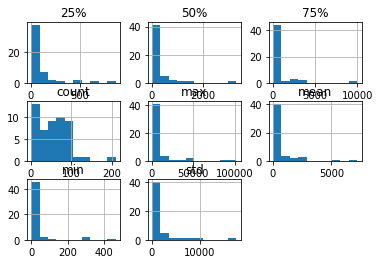

In [0]:
closed_loss.hist()
# 	count	mean	std	min	25%	50%	75%	max
# state								
# ALABAMA	61.00	520.75	2311.04	0.00	7.00	27.00	93.00	14064.00
# ALASKA	15.00	28.00	41.38	0.00	1.50	14.00	42.50	157.00
# ARIZONA	16.00	199.44	388.60	4.00	48.25	92.50	144.25	1624.00
# ARKANSAS	73.00	94.88	167.80	1.00	11.00	45.00	131.00	1137.00
# CALIFORNIA	57.00	561.05	1035.47	1.00	41.00	161.00	571.00	5641.00

Now that we have the closed loss counts of all of the states, let's begin to plot these.

Use pandas to create subplots of the `50%`, `75%` and `max` of each state.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff82b40f630>,
      dtype=object)

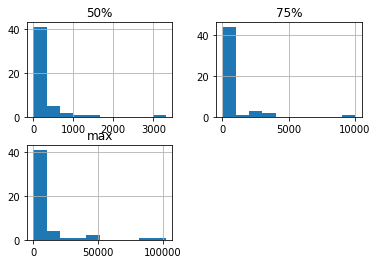

In [0]:
#import matplotlib.pyplot as plt
closed_loss[['50%', '75%', 'max']].hist()

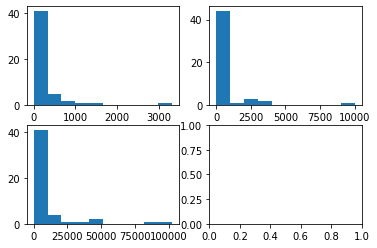

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)

ax[0,0].hist(closed_loss['50%'])
ax[0,1].hist(closed_loss['75%'])
ax[1,0].hist(closed_loss['max'])
plt.show()

# plot here

> Answer: <img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/closed-loss-subplots.png?raw=1" width="50%">

So we can see that most states are between 0 and 2000 for 50% percentile of the county, and over 5000 for the 75th percentile, and less than 50,000 for the max claims per county.

Now let's plot the total number of closed loss claims per state, sorted from most to least, and selecting just the top ten states.

In [0]:
closed_loss.head()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
ALABAMA,61.00,520.75,2311.04,0.00,7.00,27.00,93.00,14064.00
ALASKA,15.00,28.00,41.38,0.00,1.50,14.00,42.50,157.00
ARIZONA,16.00,199.44,388.60,4.00,48.25,92.50,144.25,1624.00
ARKANSAS,73.00,94.88,167.80,1.00,11.00,45.00,131.00,1137.00
CALIFORNIA,57.00,561.05,1035.47,1.00,41.00,161.00,571.00,5641.00


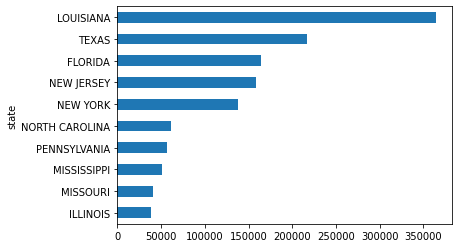

In [0]:
df_sum['closed_loss'].sort_values()[::-1][:10][::-1].plot.barh()
# write code for plot here

<img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/total-loss-state.png?raw=1" width="50%">

Now let's try to plot multiple columns simultaneously.

Group by the state and take the sum of the all of the columns, then let's sort the entire dataframe by the sum of the `closed loss` per state, descending.  Assign the resulting dataframe to `states_by_loss_claims_all_cols`.

In [0]:
states_by_loss_claims_all_cols = df_claims_reduced.groupby(['state']).sum().sort_values(by='closed_loss')[::-1]

In [0]:
states_by_loss_claims_all_cols[:5]

# 	closed_loss	open_loss	cwop_loss	total_pay
# state				
# LOUISIANA	364596	701	84847	19444472963.33
# TEXAS	216463	254	52546	6897342613.53
# FLORIDA	164245	331	91395	4171595996.58
# NEW JERSEY	159084	1435	29990	5978027433.87
# NEW YORK	137703	503	27366	5350693515.93

,closed_loss,open_loss,cwop_loss,total_pay
state,,,,
LOUISIANA,364596,701,84847,19444472963.33
TEXAS,216463,254,52546,6897342613.53
FLORIDA,164245,331,91395,4171595996.58
NEW JERSEY,159084,1435,29990,5978027433.87
NEW YORK,137703,503,27366,5350693515.93


Now plot the metrics of these top five states with a separate subplot for each column.  Make the figure large enough so the data isn't squished.  

IndexError: ignored

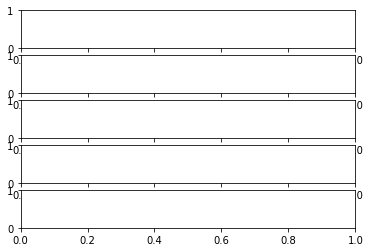

In [0]:
fig, ax = plt.subplots(5,1)
count = 0
for column in ['closed_loss', 'open_loss', 'cwop_loss', 'total_pay']:
  ax[count, 0].states_by_loss_claims_all_cols[count][column].plot.bar()
  count +=1
# write code for plots here

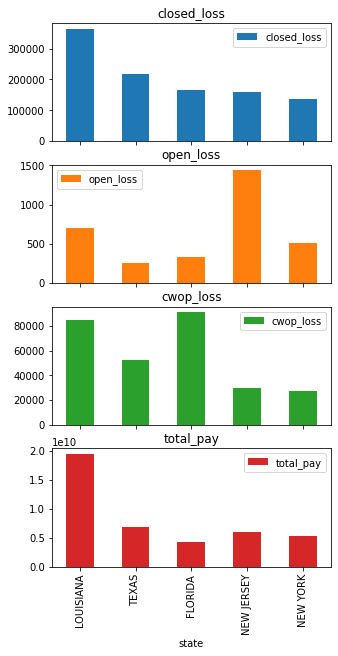

In [0]:
states_by_loss_claims_all_cols[:5].plot.bar(subplots=True)
fig = plt.gcf()
fig.set_size_inches(5,10)

> Answer <img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/subplot-states.png?raw=1" width="30%">

### Summary

In this lesson, we how to both group our data by values within a column, and then perform aggregate queries in pandas from there.  We then saw how to turn this information in bar chart's with pandas' integration with matplotlib.